<a href="https://colab.research.google.com/github/trevorlaslo/CS167/blob/main/Notebook6_Laslo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name:
Date:

## Problem Description:



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [ ]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:

import keras
import tensorflow 
print ("TensorFlow version: " + tensorflow.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.9.2
Keras version: 2.9.0


Epoch 1/5


<ipython-input-23-bd9f8c641fb7>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results = model.fit_generator(


163/163 [==============================] - 17s 101ms/step - loss: 0.3371 - accuracy: 0.8587 - val_loss: 0.9070 - val_accuracy: 0.7163
Epoch 2/5
163/163 [==============================] - 16s 100ms/step - loss: 0.1619 - accuracy: 0.9365 - val_loss: 1.0881 - val_accuracy: 0.7131
Epoch 3/5
163/163 [==============================] - 16s 101ms/step - loss: 0.1439 - accuracy: 0.9454 - val_loss: 0.6269 - val_accuracy: 0.7788
Epoch 4/5
163/163 [==============================] - 16s 101ms/step - loss: 0.1208 - accuracy: 0.9548 - val_loss: 0.6637 - val_accuracy: 0.7917
Epoch 5/5
163/163 [==============================] - 16s 101ms/step - loss: 0.1111 - accuracy: 0.9549 - val_loss: 0.7317 - val_accuracy: 0.7804


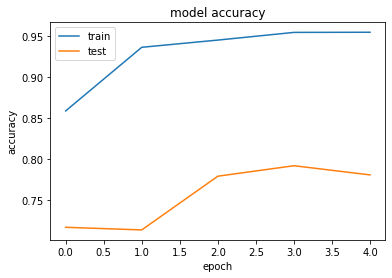

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Flatten()) 
model.add(Dense(32)) 
model.add(Dense(1,activation='sigmoid'))


opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

training_results = model.fit_generator(
        train_data,
        steps_per_epoch = len(train_data), 
        epochs=5, 
        validation_data = test_data, 
        validation_steps = len(test_data)
        )


import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Epoch 1/5


<ipython-input-25-fce408d55be5>:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results = model.fit_generator(


163/163 [==============================] - 37s 214ms/step - loss: 0.3271 - accuracy: 0.8558 - val_loss: 0.4567 - val_accuracy: 0.8013
Epoch 2/5
163/163 [==============================] - 35s 214ms/step - loss: 0.1769 - accuracy: 0.9325 - val_loss: 1.4505 - val_accuracy: 0.6747
Epoch 3/5
163/163 [==============================] - 35s 217ms/step - loss: 0.1614 - accuracy: 0.9410 - val_loss: 0.6987 - val_accuracy: 0.7853
Epoch 4/5
163/163 [==============================] - 36s 223ms/step - loss: 0.1347 - accuracy: 0.9480 - val_loss: 0.7396 - val_accuracy: 0.7228
Epoch 5/5
163/163 [==============================] - 36s 220ms/step - loss: 0.1203 - accuracy: 0.9536 - val_loss: 0.7720 - val_accuracy: 0.7292


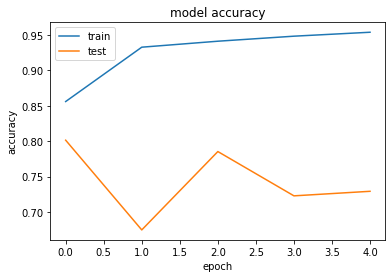

In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Flatten()) 
model.add(Dense(32)) 
model.add(Dense(1,activation='sigmoid'))


opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

training_results = model.fit_generator(
        train_data,
        steps_per_epoch = len(train_data), 
        epochs=5, 
        validation_data = test_data, 
        validation_steps = len(test_data)
        )


import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()